In [1]:
# DHH23 reuse

In [2]:
import pandas as pd
import requests
from PIL import Image
import io
import numpy as np
import string

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# data path

dpath= "C:/Users/telmi/Documents/dhh23/EarlyModernReuse/early_modern_data-main/"

# C:\Users\telmi\Documents\dhh23\reuseportfolio
meta = dpath + "metadata.csv"
clip= dpath + "clip_classification.csv"

meta = pd.read_csv(meta, dtype={"page_id":str, "ecco_id":str})
meta.head()

,page_id,ecco_id,page_number,caption_texts,estc_id,ecco_full_title,number_of_pages,language_primary,gatherings,publication_year,publication_decade,work_id,publication_place,publication_country,document_type,sub_category,authors
0,115120010200690,1151200102,69,NaN,T154436,A general treatise of husbandry and gardening....,388,English,8vo,1724.0,1720.0,14971-general treatise of husbandry and gardening,London,England,Book,scientificimprovementagricultureanimalhusbandry,"Bradley, Richard, 1688-1732."
1,075200060000430,0752000600,43,NaN,T147573,"Euclide's Elements; the whole fifteen books, c...",400,English,8vo,1751.0,1750.0,59-elements,London,England,Book,scientificimprovementmathematics,Euclid.
2,103570040003930,1035700400,393,NaN,T121680,The young mathematician's guide. Being a plain...,468,English,8vo,1719.0,1710.0,1302-young mathematicians guide being plain an...,London,England,Book,scientificimprovementmathematics,"Ward, John, active 1698-1709."
3,023990050201390,0239900502,139,Lilium candidum,T84361,"Medical botany, containing systematic and gene...",273,English,4to,1790.0,1790.0,X-T84361,London,England,Book,NaN,NaN
4,098690010103780,0986900101,378,NaN,T145140,An arrangement of British plants; according to...,435,English,8vo,1796.0,1790.0,25149-botanical arrangement of all vegetables ...,Birmingham,England,Book,scientificimprovementnaturalhistory,"Withering, William, 1741-1799."


In [4]:
df = pd.read_csv(clip)

df["page_id"] = df["Image"].apply(lambda x: x.split("_")[0])
df.head()


,Image,Category,Score,Second_choice,2ndScore,page_id
0,120040010108040_0.png,animal,94.335938,anatomy,1.838684,120040010108040
1,042570140003550_0.png,mat_geo_astro,89.453125,architecture,7.116699,042570140003550
2,027900080000910_0.png,mat_geo_astro,99.853516,architecture,0.066614,027900080000910
3,108140010003130_1.png,mat_geo_astro,98.730469,sea,1.097107,108140010003130
4,014880210003390_1.png,mat_geo_astro,96.289062,misc,2.030945,014880210003390


In [5]:
bot = df[df["Category"]=="botanical"]
bot = bot[bot["Score"]> 50]

# merge with metadata

data = bot.merge(meta, on="page_id").drop_duplicates(subset=["Image"])
data.head()

,Image,Category,Score,Second_choice,2ndScore,page_id,ecco_id,page_number,caption_texts,estc_id,...,language_primary,gatherings,publication_year,publication_decade,work_id,publication_place,publication_country,document_type,sub_category,authors
0,097220010800110_0.png,botanical,88.525391,animal,8.898926,097220010800110,0972200108,11,NaN,T208360,...,English,8vo,1793.0,1790.0,X-T208360,London,England,Book,NaN,NaN
1,097220010800110_1.png,botanical,52.441406,animal,36.621094,097220010800110,0972200108,11,NaN,T208360,...,English,8vo,1793.0,1790.0,X-T208360,London,England,Book,NaN,NaN
2,054880050000090_0.png,botanical,90.478516,animal,6.872559,054880050000090,0548800500,9,Cinchona officinalis Linnæi.,T56790,...,Latin,8vo,1764.0,1760.0,90887-dissertatio medica inauguralis de cincho...,Edinburgh,Scotland,In-between,scientificimprovementmedicineandanatomy,"Pulteney, Richard, 1730-1801."
3,028280080001530_1.png,botanical,66.503906,animal,28.149414,028280080001530,0282800800,153,Scabions & Divels bit.,T129365,...,English,8vo,1798.0,1790.0,84909-a complete herbal of james newton m,London,England,Pamphlet,scientificimprovementagricultureanimalhusbandry,"Newton, James, 1670?-1750."
4,038450020103080_1.png,botanical,51.074219,animal,28.637695,038450020103080,0384500201,308,american aloes.#Hypocistis#True acacia#German ...,T31045,...,English,4to,1748.0,1740.0,15633-histoire generale des drogues,London,England,Book,historygeneral,"Pomet, Pierre, 1658-1699."


In [6]:
# sth
data.columns

Index(['Image', 'Category', 'Score', 'Second_choice', '2ndScore', 'page_id',
       'ecco_id', 'page_number', 'caption_texts', 'estc_id', 'ecco_full_title',
       'number_of_pages', 'language_primary', 'gatherings', 'publication_year',
       'publication_decade', 'work_id', 'publication_place',
       'publication_country', 'document_type', 'sub_category', 'authors'],
      dtype='object')

61.9140625


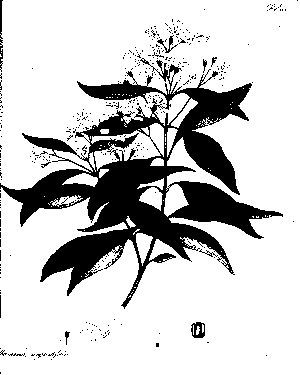

58.935546875


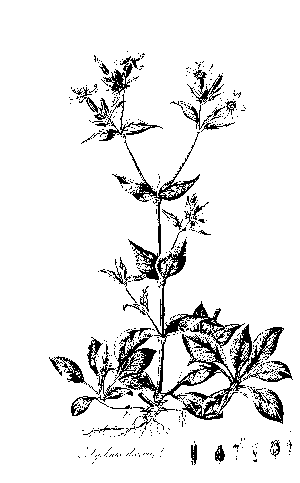

56.396484375


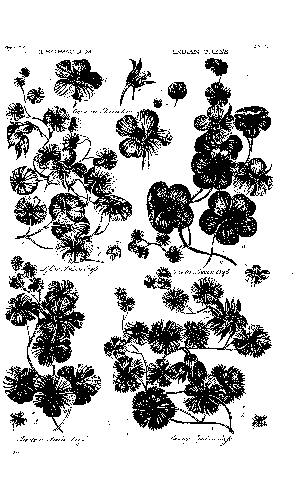

89.208984375


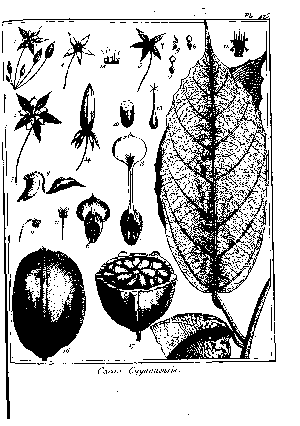

51.46484375


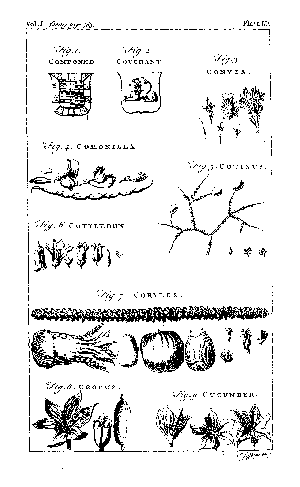

80.224609375


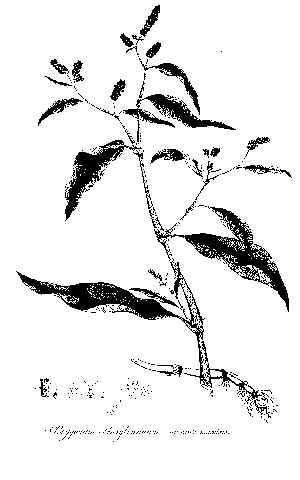

70.8984375


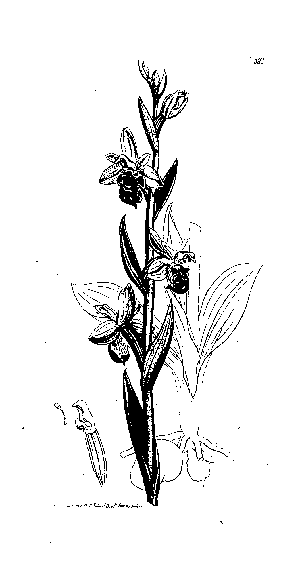

58.251953125


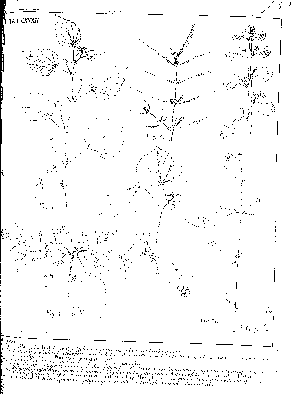

62.40234375


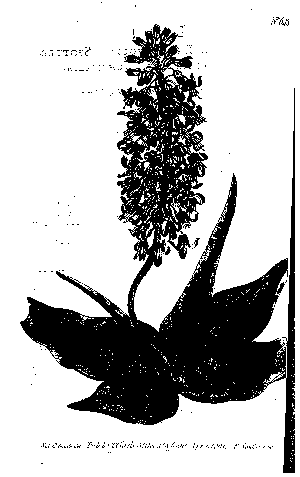

75.439453125


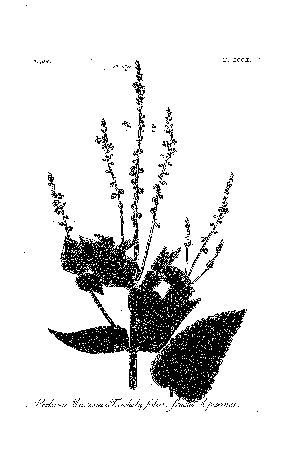

In [7]:
# view some data


for image,r in data.sample(10).iterrows():
    page_id = r["page_id"]
    # https://a3s.fi/dhh23-em-pages/021950020103780.png
    # URL of the image
    image_url = "https://a3s.fi/dhh23-em-pages/"+page_id+".png"
    print(r["Score"])
    # Send a GET request to the image URL
    response = requests.get(image_url)

    # Read the image data from the response
    image_data = response.content

    # Create a PIL image object from the image data
    image = Image.open(io.BytesIO(image_data))

    # Display the image in the notebook output
    #image.show()
    #display(image)
    # Resize the image
    new_width = 300  # Set the desired width
    new_height = int(image.size[1] * (new_width / image.size[0]))  # Maintain the aspect ratio
    resized_image = image.resize((new_width, new_height))

    # Display the resized image in the notebook output
    display(resized_image)

In [8]:
dec=data.groupby(["gatherings","publication_decade"]).size().reset_index(name="count")
dec_book=data.groupby(["gatherings","publication_decade"])["ecco_id"].nunique().reset_index(name="count")

In [9]:
dec_book

,gatherings,publication_decade,count
0,12mo,1730.0,5
1,12mo,1740.0,4
2,12mo,1750.0,5
3,12mo,1760.0,1
4,12mo,1770.0,6
5,12mo,1790.0,8
6,12mo,1800.0,2
7,16mo,1780.0,1
8,16mo,1790.0,2
9,2fo,1680.0,1


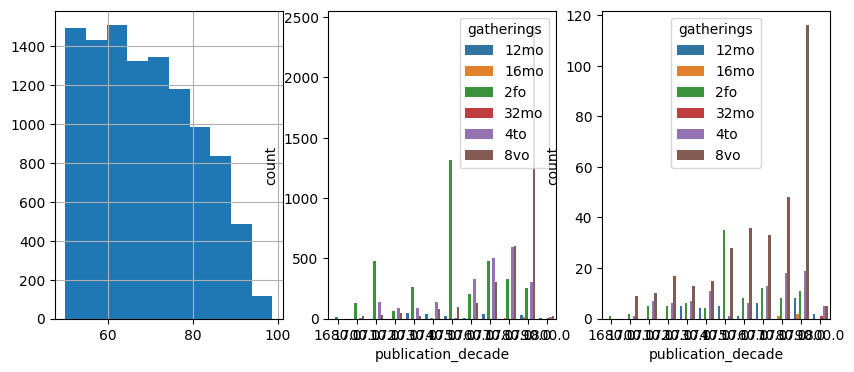

In [10]:
# data exploration

fig, axs = plt.subplots(1,3, figsize=(10,4))

# histograms
axs0=data["Score"].hist(ax=axs[0]) # categorization score distribution
axs1=sns.barplot(data=dec, x='publication_decade', y='count',hue="gatherings", ax=axs[1]) 
axs2=sns.barplot(data=dec_book, x='publication_decade', y='count',hue="gatherings", ax=axs[2]) 

#plot.legend("")
#dec.plot("publication_decade","count",hue="gatherings",ax=axs[1])
#axs2=
#axs3=

In [11]:
# Linnaeus

data["authors"]=data["authors"].fillna("unk")

# Linnaeus as author
print(data[data["authors"].str.contains("Linn")].sort_values("publication_year").groupby("publication_year")["ecco_id"].nunique())

# Linnaeus mentionned in the title
# ecco_full_title
data["title_lower"]=data["ecco_full_title"].apply(lambda x: x.lower())
#data[data["title_lower"].str.contains("linn")].sort_values("publication_year")
print(data[data["title_lower"].str.contains("linn")].sort_values("publication_year").groupby("publication_year")["ecco_id"].nunique())


publication_year
1760.0    1
1776.0    1
1782.0    1
1788.0    1
1792.0    1
1796.0    1
Name: ecco_id, dtype: int64
publication_year
1756.0     1
1758.0     1
1760.0     5
1763.0     1
1764.0     1
1771.0     1
1772.0     2
1773.0     2
1774.0     1
1776.0     3
1777.0     3
1778.0     1
1779.0     2
1782.0     1
1787.0    14
1788.0     4
1789.0     2
1792.0     5
1793.0    20
1794.0     2
1796.0     4
1797.0    11
1798.0     2
1799.0     3
1800.0     4
Name: ecco_id, dtype: int64


In [15]:
# check banks

print(data[data["authors"].str.contains("Blackwell")].sort_values("publication_year").groupby("publication_year")["ecco_id"].nunique())


publication_year
1782.0    2
Name: ecco_id, dtype: int64
